<h1>Dog-Cat Image Classification Project.</h1>
<p>CNN ---> Convoltuional Neural Network<br>
CNN study the image and extract it's feature and rather than  passing complete information to the ANN it's pass feature of images.<br>
CNN is used to deal with graphical or visual data (images and videos). To percieve the visual information. It is main block of computer vision. <br>
Three types of network in deep learning :- ANN (thinking), CNN (visual info) and RNN (natural/human readable languages).<br>
RNN ---> It is main block of natural language processing.<br><br>
CNN Architecture :-<br>
1. ANN is a part of CNN.<br>
2. Parts ---> Feature Extraction, Classification and Probabilistic Distribution.<br>
3. Feature Extraction ---> shape, size, color of image or videos.<br>
4. Classification ---> ANN, full connected layer.</p>

In [179]:
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
print("libraries imported!")

libraries imported!


<p>Binary image ---> 0 = white , 1 = black .<br>
images -: collection of pixels(0-255)<br>
binary images : pixels(0/1)  -> 0-> white , 1 -> black<br>
grayscale images : 0-> black ; 127.5 :gray ; 255: white<br>
 rgb images : red ; green ; blue (255,255,255) <br>
 red : (255,0,0 ) ; green (0,255,0) ; blue: (0,0,255)<br>
 rgb(125,200,150)--> form different color<br>

</p>

In [147]:
cat_image_demo_file_path = r"C:\Users\hp\Desktop\CNN\data\image_folder\images\cats\cat_14.jpg"

<h1>1. To open image.</h1>

In [148]:
cat = Image.open(cat_image_demo_file_path)

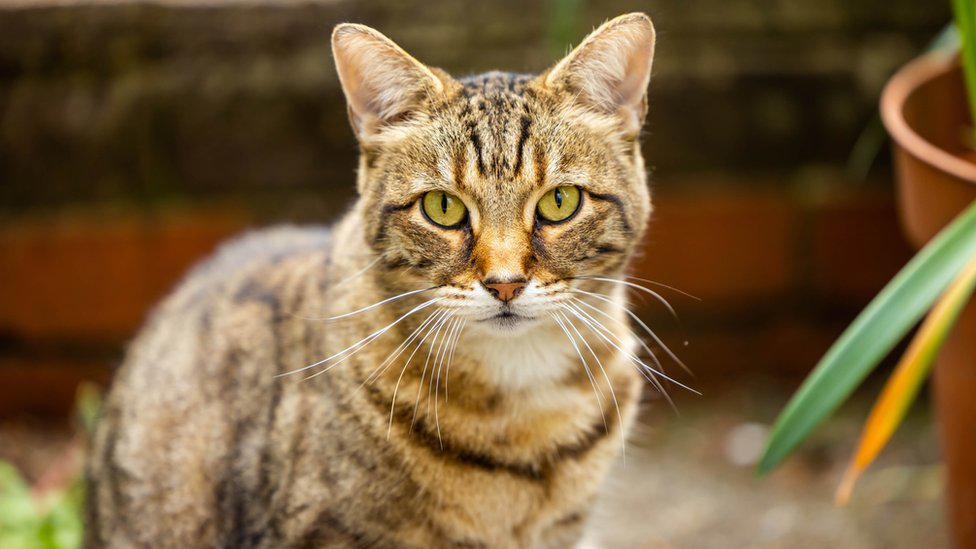

In [149]:
cat

In [150]:
cat_images = np.array(cat)
cat_images

array([[[156, 126, 100],
        [155, 125,  99],
        [155, 125,  99],
        ...,
        [ 82, 108,   0],
        [ 90, 113,   0],
        [ 96, 119,   2]],

       [[147, 117,  91],
        [147, 117,  91],
        [147, 117,  91],
        ...,
        [ 83, 109,   0],
        [ 90, 115,   0],
        [ 96, 119,   2]],

       [[141, 113,  89],
        [141, 113,  89],
        [141, 113,  89],
        ...,
        [ 84, 110,   0],
        [ 90, 115,   0],
        [ 95, 120,   2]],

       ...,

       [[189, 199, 110],
        [193, 203, 114],
        [193, 206, 118],
        ...,
        [ 92,  38,   2],
        [ 91,  37,   3],
        [ 91,  37,   3]],

       [[189, 199, 110],
        [193, 203, 114],
        [193, 206, 118],
        ...,
        [ 92,  38,   2],
        [ 91,  37,   3],
        [ 91,  37,   3]],

       [[188, 198, 109],
        [192, 202, 113],
        [193, 206, 118],
        ...,
        [ 92,  38,   2],
        [ 91,  37,   3],
        [ 91,  37,   3]]

In [151]:
cat_images.shape

(549, 976, 3)

<h1>2. Creating lists of images.</h1>

In [152]:
path_dict = {"cats":[], "dogs":[]}
images_path = r"C:\Users\hp\Desktop\CNN\data\image_folder\images"
for dir in os.listdir(images_path):
    directory_path = os.path.join(images_path, dir)
    for image_name in os.listdir(directory_path):
        path_dict[dir].append(os.path.join(directory_path, image_name))

In [153]:
os.listdir(images_path)

['cats', 'dogs']

In [154]:
path_dict

{'cats': ['C:\\Users\\hp\\Desktop\\CNN\\data\\image_folder\\images\\cats\\cat_1.jpg',
  'C:\\Users\\hp\\Desktop\\CNN\\data\\image_folder\\images\\cats\\cat_10.jpg',
  'C:\\Users\\hp\\Desktop\\CNN\\data\\image_folder\\images\\cats\\cat_100.jpg',
  'C:\\Users\\hp\\Desktop\\CNN\\data\\image_folder\\images\\cats\\cat_101.jpg',
  'C:\\Users\\hp\\Desktop\\CNN\\data\\image_folder\\images\\cats\\cat_102.jpg',
  'C:\\Users\\hp\\Desktop\\CNN\\data\\image_folder\\images\\cats\\cat_103.jpg',
  'C:\\Users\\hp\\Desktop\\CNN\\data\\image_folder\\images\\cats\\cat_104.jpg',
  'C:\\Users\\hp\\Desktop\\CNN\\data\\image_folder\\images\\cats\\cat_106.jpg',
  'C:\\Users\\hp\\Desktop\\CNN\\data\\image_folder\\images\\cats\\cat_109.jpg',
  'C:\\Users\\hp\\Desktop\\CNN\\data\\image_folder\\images\\cats\\cat_11.jpg',
  'C:\\Users\\hp\\Desktop\\CNN\\data\\image_folder\\images\\cats\\cat_111.jpg',
  'C:\\Users\\hp\\Desktop\\CNN\\data\\image_folder\\images\\cats\\cat_113.jpg',
  'C:\\Users\\hp\\Desktop\\CNN\\data

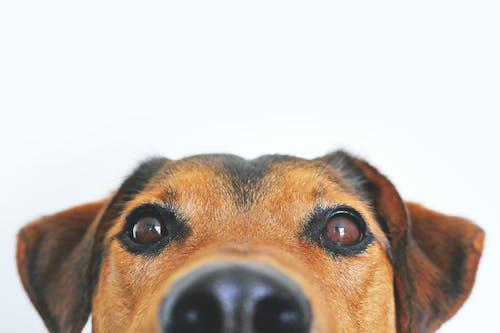

In [155]:
Image.open(path_dict["dogs"][11])

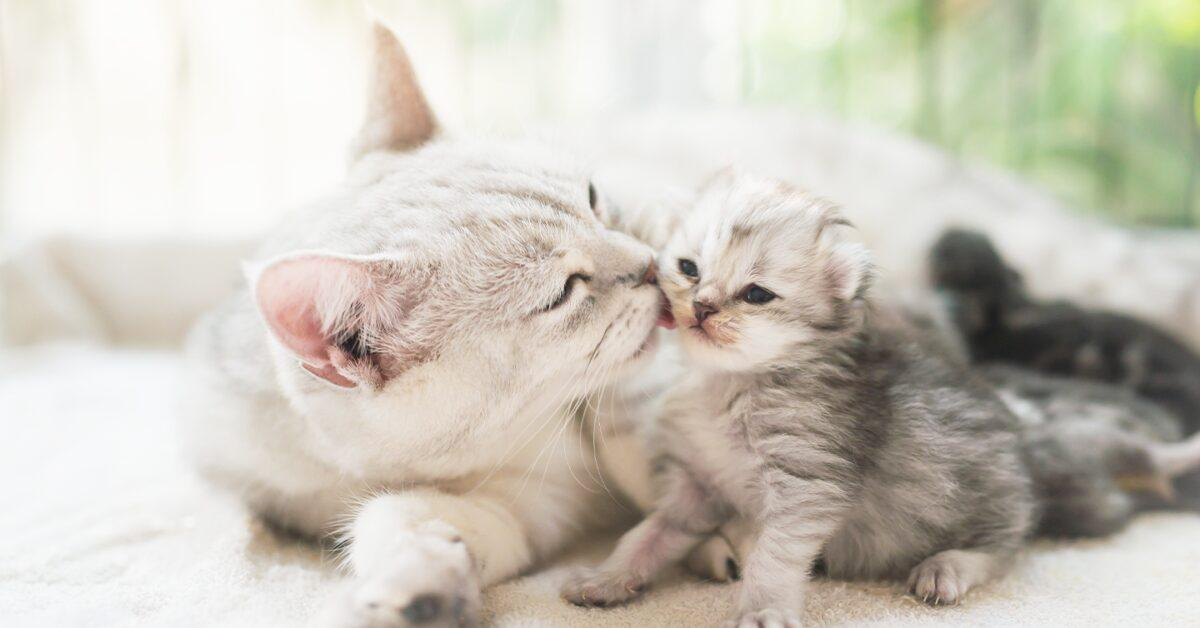

In [156]:
Image.open(path_dict['cats'][4])

In [157]:
len(path_dict['cats'])

349

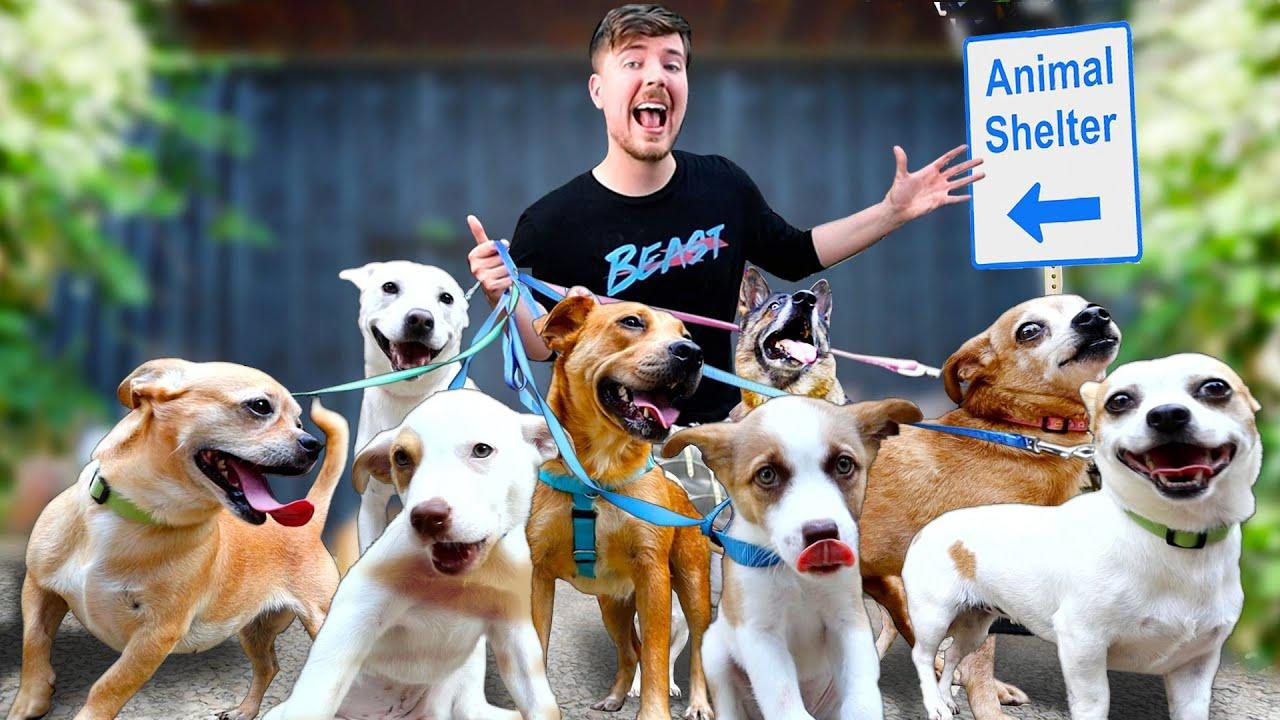

In [158]:
Image.open(path_dict['dogs'][5])

<h1>3. To read image.</h1>

In [159]:
cv2.imread(path_dict["cats"][5])

array([[[ 65,  87,  93],
        [ 61,  83,  89],
        [ 53,  75,  81],
        ...,
        [ 93, 112, 120],
        [ 92, 111, 119],
        [ 91, 110, 118]],

       [[ 54,  76,  82],
        [ 56,  78,  84],
        [ 55,  77,  83],
        ...,
        [ 91, 110, 118],
        [ 90, 109, 117],
        [ 89, 108, 116]],

       [[ 52,  74,  80],
        [ 55,  77,  83],
        [ 58,  80,  86],
        ...,
        [ 87, 106, 114],
        [ 86, 105, 113],
        [ 85, 104, 112]],

       ...,

       [[166, 183, 209],
        [205, 225, 250],
        [156, 177, 205],
        ...,
        [ 17,  23,  30],
        [ 41,  47,  54],
        [ 45,  51,  58]],

       [[129, 145, 168],
        [173, 189, 212],
        [178, 195, 221],
        ...,
        [ 67,  73,  78],
        [ 63,  69,  74],
        [ 55,  61,  66]],

       [[ 90, 104, 126],
        [145, 159, 181],
        [162, 178, 201],
        ...,
        [ 62,  69,  72],
        [ 47,  54,  57],
        [ 32,  39,  42]]

<h1>4. To resize images.</h1>

In [160]:
x = []  # np array
y = []  # images name
for key, ls_path in path_dict.items():
    for path in ls_path:
        img_arr = cv2.imread(path)
        resized_img = cv2.resize(img_arr,(224,224))
        x.append(resized_img)
        y.append(key)

In [161]:
x

[array([[[156, 141,  92],
         [159, 144, 102],
         [159, 145, 112],
         ...,
         [152, 142,  75],
         [156, 144,  80],
         [160, 148,  84]],
 
        [[151, 136,  87],
         [155, 140,  97],
         [157, 143, 107],
         ...,
         [151, 140,  75],
         [154, 142,  77],
         [157, 145,  81]],
 
        [[150, 136,  86],
         [155, 141,  96],
         [155, 140, 102],
         ...,
         [151, 139,  75],
         [153, 141,  77],
         [157, 145,  81]],
 
        ...,
 
        [[ 81,  90,  99],
         [ 77,  86,  95],
         [ 79,  88,  97],
         ...,
         [ 37,  42,  60],
         [ 39,  42,  57],
         [ 40,  43,  58]],
 
        [[ 52,  59,  59],
         [ 54,  60,  61],
         [ 51,  57,  58],
         ...,
         [ 40,  44,  59],
         [ 42,  45,  60],
         [ 43,  46,  61]],
 
        [[ 37,  41,  36],
         [ 33,  37,  34],
         [ 35,  38,  35],
         ...,
         [ 40,  43,  56],
  

In [162]:
y

['cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 

In [163]:
len(x), len(y)

(697, 697)

<h1>5. Converting Categorical data into numerical form.</h1>

In [164]:
for i in range(len(y)):
    if y[i] == "dogs":
        y[i] = 1
    else:
        y[i] = 0
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [165]:
x = np.array(x)
y = np.array(y)

In [166]:
x

array([[[[156, 141,  92],
         [159, 144, 102],
         [159, 145, 112],
         ...,
         [152, 142,  75],
         [156, 144,  80],
         [160, 148,  84]],

        [[151, 136,  87],
         [155, 140,  97],
         [157, 143, 107],
         ...,
         [151, 140,  75],
         [154, 142,  77],
         [157, 145,  81]],

        [[150, 136,  86],
         [155, 141,  96],
         [155, 140, 102],
         ...,
         [151, 139,  75],
         [153, 141,  77],
         [157, 145,  81]],

        ...,

        [[ 81,  90,  99],
         [ 77,  86,  95],
         [ 79,  88,  97],
         ...,
         [ 37,  42,  60],
         [ 39,  42,  57],
         [ 40,  43,  58]],

        [[ 52,  59,  59],
         [ 54,  60,  61],
         [ 51,  57,  58],
         ...,
         [ 40,  44,  59],
         [ 42,  45,  60],
         [ 43,  46,  61]],

        [[ 37,  41,  36],
         [ 33,  37,  34],
         [ 35,  38,  35],
         ...,
         [ 40,  43,  56],
        

In [167]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<h1>6. Ploting image in the form of chart.</h1>

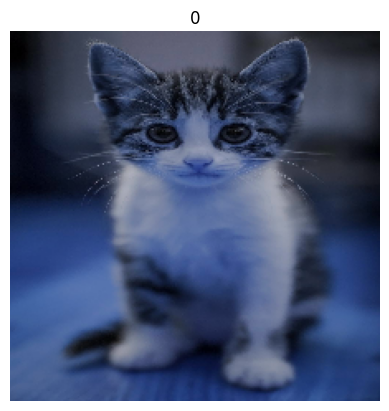

In [168]:
# to understand the pixels value
def img_render(position):
    plt.imshow(x[position])
    plt.title(y[position])
    plt.axis("off")
    plt.show()
img_render(295)    

In [169]:
x[1]

array([[[181, 184, 175],
        [169, 172, 163],
        [171, 174, 165],
        ...,
        [103, 121, 158],
        [114, 133, 168],
        [107, 126, 162]],

       [[183, 186, 177],
        [170, 173, 164],
        [171, 174, 165],
        ...,
        [111, 129, 166],
        [119, 139, 173],
        [ 98, 117, 152]],

       [[176, 179, 170],
        [178, 181, 172],
        [181, 184, 175],
        ...,
        [108, 126, 163],
        [100, 119, 154],
        [104, 123, 158]],

       ...,

       [[180, 186, 193],
        [179, 185, 192],
        [187, 190, 198],
        ...,
        [212, 209, 205],
        [206, 203, 199],
        [204, 201, 197]],

       [[181, 184, 188],
        [185, 188, 192],
        [189, 190, 195],
        ...,
        [209, 206, 202],
        [201, 198, 194],
        [199, 196, 192]],

       [[189, 189, 189],
        [192, 192, 192],
        [189, 190, 191],
        ...,
        [207, 204, 200],
        [206, 203, 199],
        [206, 204, 199]]

In [170]:
# print images in range plt.subplot() --> multiple chart at a time

<h1>7. Normalizing pixel value in range (0 to 1).</h1>
<p>In image/graphical processing, GPU is working.</p>

In [171]:
X = x/255.0
X

array([[[[0.61176471, 0.55294118, 0.36078431],
         [0.62352941, 0.56470588, 0.4       ],
         [0.62352941, 0.56862745, 0.43921569],
         ...,
         [0.59607843, 0.55686275, 0.29411765],
         [0.61176471, 0.56470588, 0.31372549],
         [0.62745098, 0.58039216, 0.32941176]],

        [[0.59215686, 0.53333333, 0.34117647],
         [0.60784314, 0.54901961, 0.38039216],
         [0.61568627, 0.56078431, 0.41960784],
         ...,
         [0.59215686, 0.54901961, 0.29411765],
         [0.60392157, 0.55686275, 0.30196078],
         [0.61568627, 0.56862745, 0.31764706]],

        [[0.58823529, 0.53333333, 0.3372549 ],
         [0.60784314, 0.55294118, 0.37647059],
         [0.60784314, 0.54901961, 0.4       ],
         ...,
         [0.59215686, 0.54509804, 0.29411765],
         [0.6       , 0.55294118, 0.30196078],
         [0.61568627, 0.56862745, 0.31764706]],

        ...,

        [[0.31764706, 0.35294118, 0.38823529],
         [0.30196078, 0.3372549 , 0.37254902]

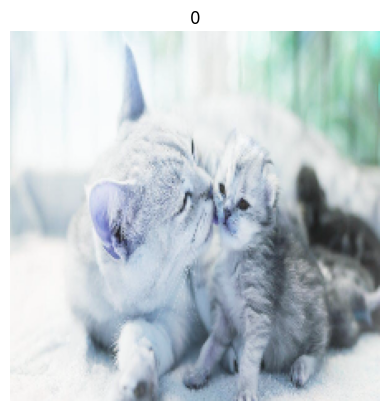

In [172]:
img_render(4)

<h1>8. Spliting data into x and y, train and test.<h1>

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
# spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

<h1>9. Creating CNN and model.</h1>
<p>input_shape ---> to define input size.<br>
MaxPooling2D(()) ---> filter size.<br>
hyper-parameter ---> no fix value.<br>
kerastuner class ---> used to determine optimal number of neurons and layers.</p>

In [175]:
model = Sequential([
    # Convolutional layers
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(15, (3,3), activation='relu'),

    #flattening layer
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(24, activation='relu'),
    layers.Dense(18, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary for a detailed overview
model.summary()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │     2,163,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,201,107 (8.40 MB)

 Trainable params: 2,201,107 (8.40 MB)

 Non-trainable params: 0 (0.00 B)

<h1>10. Training and Testing model. </h1>
<p>592/32 ---> 18.5 ---> 19<br>
batch size ---> 19</p>

In [176]:
logs = model.fit(x_train, y_train, epochs=8, validation_data=(x_test,y_test))

Epoch 1/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 588ms/step - accuracy: 0.5108 - loss: 89.7894 - val_accuracy: 0.5143 - val_loss: 0.6931
Epoch 2/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 743ms/step - accuracy: 0.4902 - loss: 0.6932 - val_accuracy: 0.5143 - val_loss: 0.6931
Epoch 3/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 695ms/step - accuracy: 0.5063 - loss: 0.6934 - val_accuracy: 0.5143 - val_loss: 0.6931
Epoch 4/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 596ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.5143 - val_loss: 0.6931
Epoch 5/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 557ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.5143 - val_loss: 0.6931
Epoch 6/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 556ms/step - accuracy: 0.4822 - loss: 0.6932 - val_accuracy: 0.5143 - val_loss: 0.6931
Epoch 7/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 556ms/step - accuracy: 0.4974 - loss: 0.6932 - val_accuracy: 0.4857 - val_loss: 0.6931
Epoch 8/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 559ms/step - accuracy: 0.5157 - loss: 0.6931 - val_accuracy: 0

In [177]:
x_train.shape

(592, 224, 224, 3)

<h1>11. Creating dataframe from model history.</h1>

In [180]:
df = pd.DataFrame(logs.history)
df

accuracy       loss  val_accuracy  val_loss
0  0.506757  40.950771      0.514286  0.693121
1  0.496622   0.693156      0.514286  0.693114
2  0.496622   0.693341      0.514286  0.693117
3  0.496622   0.693164      0.514286  0.693121
4  0.496622   0.693157      0.514286  0.693128
5  0.496622   0.693159      0.514286  0.693137
6  0.486486   0.693151      0.485714  0.693148
7  0.503378   0.693156      0.485714  0.693155

<h1>12. Ploting dataframe.</h1>
<p>overfit model</p>

<Axes: >

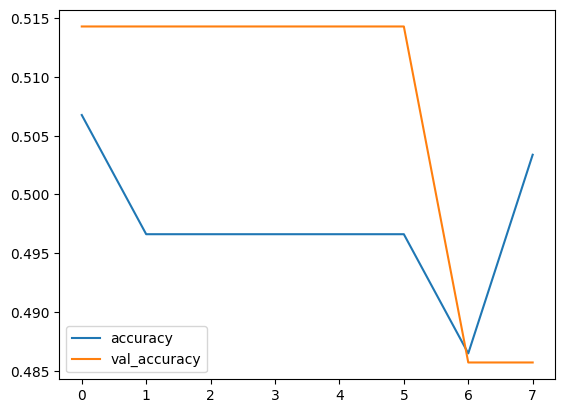

In [181]:
df[["accuracy", "val_accuracy"]].plot()

<h1>13. Prediction.</h1>

In [182]:
print(model.evaluate(x_train, y_train))
print(model.evaluate(x_test, y_test))

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.4858 - loss: 0.6932
[0.6931454539299011, 0.5033783912658691]
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.4922 - loss: 0.6932
[0.6931546330451965, 0.48571428656578064]


In [ ]:
# classification report
# confusion matrix
# mnist dataset in tensoflow
# 